# Problem Statement

The project's purpose is to "predict the potentially fraudulent providers" based on the claims they file. Together with this, we will find significant characteristics that will aid in spotting possibly fraudulent providers' behaviour. In addition, we will investigate fraudulent tendencies in provider claims to better predict provider behaviour in the future.

### Dataset

1)Inpatient Data:
This data gives information regarding the claims submitted for patients admitted to hospitals.
It also includes information such as their admission and discharge dates, as well as their admit diagnostic code. 

2)Outpatient Data:
This data contains information regarding claims submitted for people who visit hospitals but are not admitted. 

c)Beneficiary Details Data:
This data comprises beneficiary KYC information such as health problems, region of residence, and so forth.


### Importing required libraries

In [1]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 53.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Loading Train & Test datasets

In [3]:
# Load Train Dataset

Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [4]:
# Load Test Dataset

Test=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv")


In [5]:
#Checking the shapes of train dataset
print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)


Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)


In [6]:
#Checking the shapes of test dataset
print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [7]:
#Checking the missing values of beneficiary data.

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [8]:
#checking data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
Train_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [10]:
#Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1 - in beneficiary data

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [11]:
Train_Beneficiarydata.head(5)
Test_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,...,1,0,1,0,0,0,21260,2136,120,100


**Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)**

In [12]:
## Lets Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [13]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [14]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


**Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead on not**

In [15]:
#Lets create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1

In [16]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

**Create new column 'AdmitForDays' indicating number of days patient was admitted in hospital**

In [17]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [18]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [19]:
#Checking the null values of outpatient data
Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [20]:
##Checking the Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


### Data Merging


As we see columns in inpatient and outpatient data are similar, we will merge this data based on these similar keys using outer join.

In [21]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


Merge Inpatient and Outpatient

In [22]:
#We will use all keys in outpatient data as we want to merge and dont want duplicate columns from both tables.

Train_Allpatient=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')



In [23]:
Test_Allpatient=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [24]:
print('Train_Allpatient',Train_Allpatient.shape)
print('Test_Allpatient',Test_Allpatient.shape)

Train_Allpatient (558211, 31)
Test_Allpatient (135392, 31)


In [25]:
Train_Allpatient.head(4)
Test_Allpatient.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN


Merge Beneficiary details to All Patients data

In [26]:
#Merging All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_all_detail=pd.merge(Train_Allpatient,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_all_detail=pd.merge(Test_Allpatient,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [27]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_all_detail.shape)
Train_all_detail.head()

print('Shape of All Patient Details Test : ',Test_all_detail.shape)
Test_all_detail.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,67.0,0.0


Merge PotentialFraud details for each provider to create Provider data along with Patient Details 

In [28]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_Provider =pd.merge(Train,Train_all_detail,on='Provider')

Test_Provider =pd.merge(Test,Test_all_detail,on='Provider')

In [29]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_Provider.shape)
Train_Provider.head()

print("Shape of Test Provider with Patient Details data :-",Test_Provider.shape)
Test_Provider.head(2)

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,75.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [30]:
print("Expected rows after addition",135392+558211)

Expected rows after addition 693603


In [31]:
#Checking the  missing value percentage of all the columns

print('Percent missing values in Train Provider with patient details data :\n')
Train_Provider.isnull().sum()*100/len(Train_Provider)


print('Percent missing values in Test Provider with patient details data :\n')
Test_Provider.isnull().sum()*100/len(Test_Provider)

Percent missing values in Train Provider with patient details data :

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [32]:
##Checking the dtypes of both the datasets
Train_Provider.dtypes
Test_Provider.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


In [33]:
#Creating a copy of test data first and merge test with train to get better feature averages

Test_ProviderWithPatientDetailsdata=Test_Provider

In [34]:
#Lets Check shape of copy

print('Shape of Test Copy :-',Test_ProviderWithPatientDetailsdata.shape)

Shape of Test Copy :- (135392, 57)


Merging Train and Test ( 2 dataframe merging vertically)

In [35]:
#We will concat two datasets using columns of Test data only as we dont see target column in Test data.

col_merge=Test_Provider.columns

In [36]:
## Lets add both test and train datasets

Test_Provider=pd.concat([Test_Provider,
                         Train_Provider[col_merge]])

In [37]:
### Lets verify shape after concatenating

print("Shape of Test After Concatenation",Test_Provider.shape)


Shape of Test After Concatenation (693603, 57)


### Data Preprocessing

In [38]:
#Imputing numeric columns with 0

cols1 = Train_Provider.select_dtypes([np.number]).columns
cols2 = Train_Provider.select_dtypes(exclude = [np.number]).columns

Train_Provider[cols1] = Train_Provider[cols1].fillna(value=0)
Test_Provider[cols1]=Test_Provider[cols1].fillna(value=0)
print('Test_Provider shape:',Test_Provider.shape)

Test_Provider shape: (693603, 57)


In [39]:
#Checking record number 135392 as this will be record from train datasets.
Test_Provider.iloc[[135392]]

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,...,1,0,0,0,0,0,300,110,80.0,0.0


**Feature Selection**

In [40]:
#Removing unnecessary columns

cols=Train_Provider.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_fs=Train_Provider.drop(axis=1,columns=remove_these_columns)
Test_fs=Test_Provider.drop(axis=1,columns=remove_these_columns)


In [41]:
## Lets Check shape and missing values

print('Train Shape :',Train_fs.shape)
print('Test Shape : ',Test_fs.shape)
print("Train Missing Values",Train_fs.isnull().sum().sum())
print("Test Missing Values",Test_fs.isnull().sum().sum())

Train Shape : (558211, 27)
Test Shape :  (693603, 26)
Train Missing Values 0
Test Missing Values 0


**Type Conversion**

In [42]:
#Converting types of gender and race to categorical.

Train_fs.Gender=Train_fs.Gender.astype('category')
Test_fs.Gender=Test_fs.Gender.astype('category')

Train_fs.Race=Train_fs.Race.astype('category')
Test_fs.Race=Test_fs.Race.astype('category')

In [43]:
#Creating dummies for categorrical columns.

Train_fs=pd.get_dummies(Train_fs,columns=['Gender','Race'],drop_first=True)
Test_fs=pd.get_dummies(Test_fs,columns=['Gender','Race'],drop_first=True)

In [44]:
Train_fs.head()


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,No,20,0.0,0.0,1,12,12,1,1,...,0,0,300,110,80.0,0.0,0,0,0,0
1,PRV51001,No,700,0.0,0.0,0,12,12,1,0,...,0,0,720,10,67.0,0.0,0,0,0,0
2,PRV51001,No,900,0.0,0.0,0,12,12,0,0,...,0,0,1380,370,76.0,0.0,1,0,0,0
3,PRV51001,No,500,0.0,0.0,0,12,12,1,1,...,2020,1068,6700,2700,74.0,0.0,0,0,0,0
4,PRV51001,No,36000,1068.0,5.0,0,12,12,0,1,...,36000,1068,3520,140,69.0,0.0,0,0,0,0


In [45]:
#Converting Target values to 1 and 0,where '1' means Yes and '0' means No

Train_fs.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_fs.head()
Train_fs.PotentialFraud=Train_fs.PotentialFraud.astype('int64')
Train_fs.PotentialFraud.dtypes

dtype('int64')

In [46]:
print('Test Shape before removing',Test_fs.shape)

Test Shape before removing (693603, 28)


In [47]:
Test_fs=Test_fs.iloc[:135392]   #Remove train data from appended test data (as 135392 is the last record of train data)

In [48]:
#Aggregating claims data to unique providers.

Train=Train_fs.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Test=Test_fs.groupby(['Provider'],as_index=False).agg('sum')

In [49]:
Train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,440150,22428,65380,11598,1971.0,0.0,16,4,0,0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,999000,122948,353520,97300,9243.0,1.0,78,24,0,1


In [50]:
print('Providers in Train:' ,Train.shape)
print('Providers in Test :',Test.shape)

Providers in Train: (5410, 28)
Providers in Test : (1353, 27)


**Train Validation split**

In [51]:
## Lets Seperate out Target and providers from independent variables.Create Target column y.

X=Train.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train['PotentialFraud']

In [52]:
#Feature Scaling: standerdization

#Apply StandardScaler and transform values to its z form,where 99.7% values range between -3 to 3.
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

X_teststd=sc.transform(Test.iloc[:,1:])   #Apply Standard Scaler to unseen data as well.

In [53]:
print('X Shape:',X_std.shape)

X Shape: (5410, 26)


#### Train & Test split


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=101)

In [55]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (3787, 26)
y_train : (3787,)
X_test : (1623, 26)
y_test : (1623,)


In [56]:
import numpy as np

class Node:
    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [57]:
class DecisionTree:
    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=5):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    
    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)
    
    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2
    
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)
    
        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()


In [58]:
classifier = DecisionTree()

In [59]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [60]:
import time
# record start time
start_time = time.time()

In [61]:
classifier.fit(X_train , y_train)

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 2327.12 seconds


In [73]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60

    return "%d:%02d:%02d" % (hour, minutes, seconds)

n = 2327.12
print("The time taken by the model(in minutes):",convert(n))


The time taken by the model(in minutes): 0:38:47


In [65]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [66]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[  76   73]
 [  67 1407]]
Accuracy 0.9137399876771412
Recall: 0.5314685314685315
Precision: 0.5100671140939598
F-score: 0.5205479452054795


In [74]:
import time
# record start time
start_time = time.time()

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
dt_pred = dt_model.predict(X_test)
dt_pred

array([0, 1, 0, ..., 0, 0, 0])

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,dt_pred))

[[1392   88]
 [  68   75]]


In [72]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1480
           1       0.46      0.52      0.49       143

    accuracy                           0.90      1623
   macro avg       0.71      0.73      0.72      1623
weighted avg       0.91      0.90      0.91      1623



In [76]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 9.51 seconds


### Comparision

In [2]:
code1 = [2327.12, "91.37 %","53.46%","51%","52.05%"]
df1 = pd.DataFrame({'without using sklearn ': code1})

code2 = [0.9, "90 %","71%","73%","72%"]
df2 = pd.DataFrame({'With sklearn': code2})


result = ['Time stamp', 'Accuracy','Recall','Precision','F1 Score']
df3 = pd.DataFrame({'Column': result})


# display the results in a table
df_r = pd.concat([df3, df1, df2], axis=1)

print("\n")
print(df_r)



       Column without using sklearn  With sklearn
0  Time stamp                2327.12         9.51
1    Accuracy                91.37 %         90 %
2      Recall                 53.46%          71%
3   Precision                    51%          73%
4    F1 Score                 52.05%          72%


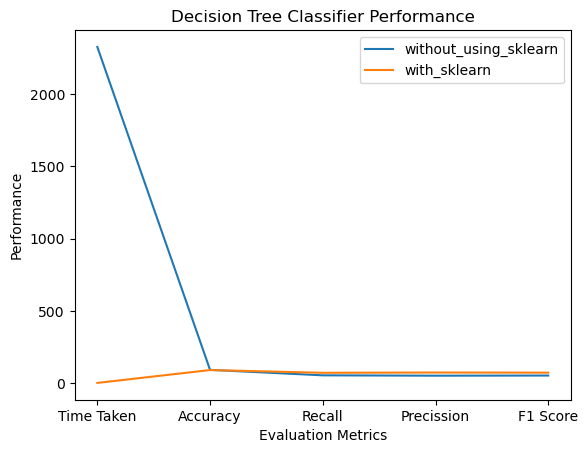

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
without_using_sklearn = [2327.12, 91.37,53.46,51,52.05]
with_sklearn = [0.9,90,71,73,72]


# Define the labels for each performance measure
labels = ['Time Taken', 'Accuracy','Recall','Precission', 'F1 Score']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, without_using_sklearn, label='without_using_sklearn')
ax.plot(x, with_sklearn, label='with_sklearn')


# Add labels, title, and legend
ax.set_xlabel('Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Classifier Performance')
ax.legend()

# Show the plot
plt.show()